In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import re

FILES

In [2]:
# high flow
file1 = '23-07-26_schlieren-06_postprocess-01_fluoro-3to3mm-1525ccm'
file2 = '23-07-26_schlieren-04_postprocess-02_fluoro-3to2mm-1422ccm-flipped'
file3 = '23-07-28_schlieren-05_postprocess-02_fluoro-3to1mm-1084ccm-flipped'

# low flow
file4 = '23-07-28_schlieren-01_postprocess-02_fluoro-3to3mm-602ccm-flipped'
file5 = '23-07-28_schlieren-02_postprocess-02_fluoro-3to2mm-666ccm-flipped'
file6 = '23-07-28_schlieren-06_postprocess-02_fluoro-3to1mm-417ccm-flipped'

READ FILES

In [3]:
files = [file1, file4, file2, file5, file3, file6]
root = 'processed/'
ext = '.avi'
paths = [root+file+ext for file in files]
captures = [cv.VideoCapture(path) for path in paths]

In [4]:
def get_flowrate(file):
    return re.search('[0-9]*ccm', file).group(0)

data_labels = [get_flowrate(file) for file in files] 
data_labels

['1525ccm', '602ccm', '1422ccm', '666ccm', '1084ccm', '417ccm']

SELECT FRAME

In [5]:
def get_frame(capture, n):
    ii=0
    while ii<n:
        rtn, frame = capture.read()
        ii+=1
    return frame

In [6]:
t = 5 # seconds
fr = t*24
frames = [get_frame(capture, fr) for capture in captures]

DISPLAY FRAME

In [7]:
font = { #'weight' : 'bold',
        'size'   : 14,
        'horizontalalignment': 'center',
        'verticalalignment' : 'bottom'
       }

def show_frame(frame): # return plt
    plt.figure(figsize=(8,8), edgecolor='black', linewidth = 1.5)
    plt.imshow(frame, cmap='gray', vmin=0, vmax=255) # on scale 0-255!
    plt.axis('off')
    plt.text(750,1500,'1552 ccm', fontdict = font)
    return plt

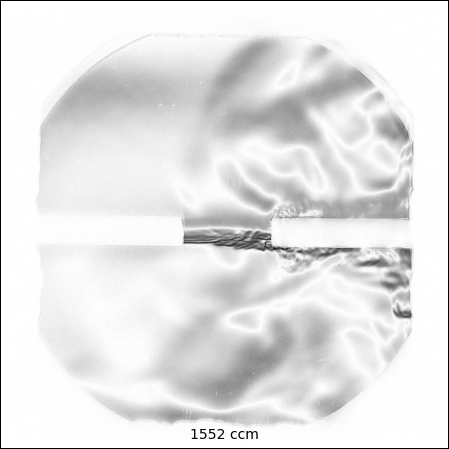

In [8]:
show_frame(frames[0]).show()

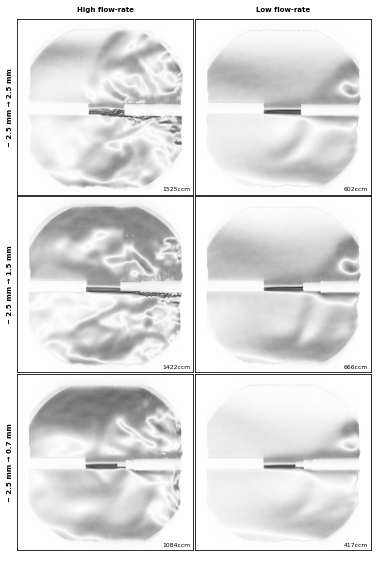

In [9]:
ROW_TITLES = ['~ 2.5 mm \u2192 2.5 mm', 
              '~ 2.5 mm \u2192 1.5 mm', 
              '~ 2.5 mm \u2192 0.7 mm']

COL_TITLES = ['High flow-rate',
              'Low flow-rate']

def make_figure(frames, data_labels): # on scale 0-255! returns plt
    
    font_axes = { 
        'weight' : 'bold',
        'size'   : 7,
        'horizontalalignment': 'center',
        'verticalalignment' : 'bottom'
       }
    font_labels = { 
        'size'   : 6,
        'horizontalalignment': 'right',
        'verticalalignment' : 'bottom'
       }
    label_coords = (1475, 1475)
    fig, axes = plt.subplots(3,2)
    for ii, ax in enumerate(axes.flat): # put frames
        ax.imshow(frames[ii], cmap= 'gray', vmin=0, vmax=255)
        ax.text(label_coords[0], label_coords[1], data_labels[ii], fontdict = font_labels)
    fig.set_size_inches(5.3,7.9) # a4 fit

    for ax in axes.flat: # remove axes px values
        ax.set_xticks([])
        ax.set_yticks([])

    # column titles
    axes[0,0].set_title(COL_TITLES[0], fontdict = font_axes)
    axes[0,1].set_title(COL_TITLES[1], fontdict = font_axes)

    # row titles
    axes[0,0].set_ylabel(ROW_TITLES[0], fontdict = font_axes)
    axes[1,0].set_ylabel(ROW_TITLES[1], fontdict = font_axes)
    axes[2,0].set_ylabel(ROW_TITLES[2], fontdict = font_axes)

    plt.tight_layout(h_pad=0.01, w_pad=0.01)
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    fig.patch.set_facecolor('white')
    return plt

make_figure(frames, data_labels).show()

SAVE FIG

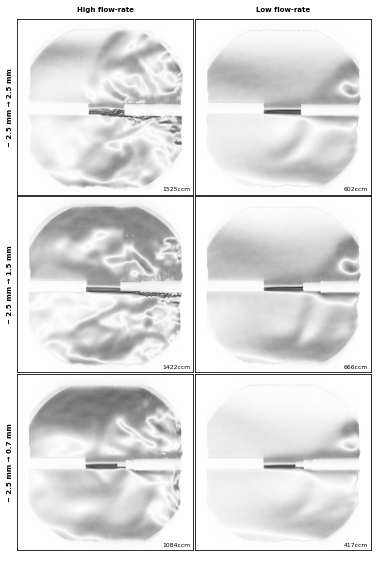

In [10]:
make_figure(frames, data_labels).savefig('fig2.png', dpi=900)